# Plot cyclone damage to mangroves


## Import libraries

In [9]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd

## User Inputs 

* **cname:**  The name of the cyclone of interest. Must be one of:
    - `'IngridLF2'`, `'Laurence'`, `'Lam'`, `'Ita'`, `'MonicaLF1'`, `'NathanLF2'`,`'Marcia'`, 
    
    `'NathanLF1'`, `'IngridLF1'`, `'George'`, `'Larry'`, `'Yasi'`, `'IngridLF3'`, `'MonicaLF2'`

* **dir_name:** The directory name to get the cyclone damage data from, must be either `'cyclone_damage_tally/'`, or `'cyclone_damage_tally_notsure/'`

In [32]:
#cyclone name
cname = 'Yasi' 

dir_name = 'cyclone_damage_tally_notsure/'


### set up dictionaries, tables

In [33]:
cyclone_name = {
    'Ingrid_Landfall2':'IngridLF2', #the key is the file name of windspeed, the value is the cyclone name
    'Laurence':'Laurence',
    'Lam':'Lam',
    'Ita':  'Ita',
    'Monica_Landfall1':'MonicaLF1',
    'Nathan_Landfall2':'NathanLF2',
    'Marcia': 'Marcia',
    'Nathan_Landfall1':'NathanLF1',
    'Ingrid_Landfall1': 'IngridLF1',
    'George':'George',
    'Larry':'Larry',
    'Yas':'Yasi',
    'Ingrid_Landfall3':'IngridLF3',
    'Monica_Landfall2':'MonicaLF2'
}

fname = dir_name + cname+'_tally.pkl'
print("load tables", fname)
with open(fname, 'rb') as f:
    wind_cat_full, all_wind_cat_full = pickle.load(f)

load tables cyclone_damage_tally_notsure/Yasi_tally.pkl


## Selected cyclone's impact

In [34]:
wind_cat_full # immediate impact

,0,1,2,3,4
C1,6.00875,1.56063,0.006875,0.035,0.0375
C2,4.73563,1.01375,0.00125,0.005,0.031875
C3,64.6088,33.115,0.904375,0.216875,0.601875
C4,80.4475,138.901,32.8756,0.30875,3.6925
C5,0.443125,2.80375,3.455,0.033125,1.36375


In [35]:
all_wind_cat_full #long term impact

,1,2,3,4,5
C1,2.72438,0.386875,0.18,0.005,0
C2,1.80063,0.00375,0.14125,0.003125,0.01125
C3,41.2213,5.27813,2.11063,0.0875,0.1225
C4,152.864,26.1956,9.13563,0.13625,0.660625
C5,3.06063,2.9075,1.48938,0.006875,0.214375


### Plot cyclone immediate impact

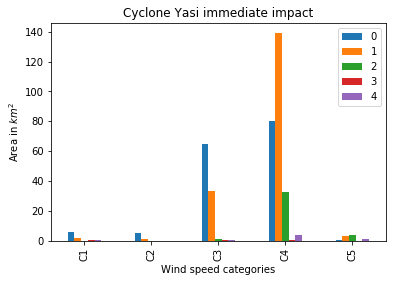

In [36]:
figure_a = wind_cat_full.astype('float').plot(kind='bar', title='Cyclone ' + cname +' immediate impact')
figure_a.set_ylabel('Area in $km^2$')
figure_a.set_xlabel('Wind speed categories')
plt.show()

### Plot cyclone long-term impact

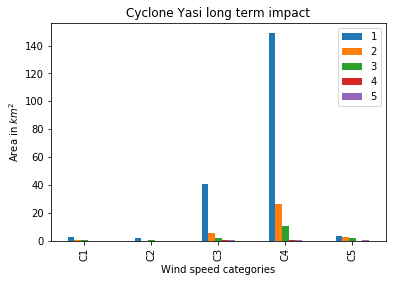

In [23]:
figure_a = all_wind_cat_full.astype('float').plot(kind='bar', title='Cyclone ' + cname + ' long term impact')
figure_a.set_ylabel('Area in $km^2$')
figure_a.set_xlabel('Wind speed categories')
plt.show()

## Impact of all cyclones by category

In [24]:
im_cat = None
lg_cat = None
for cname in cyclone_name.values():
    fname = dir_name + cname+'_tally.pkl'
    with open(fname, 'rb') as f:
        tmp_im_cat, tmp_lg_cat = pickle.load(f)
        if im_cat is None:
            im_cat = tmp_im_cat
            lg_cat = tmp_lg_cat
        else:
            im_cat += tmp_im_cat
            lg_cat += tmp_lg_cat
    

In [25]:
im_cat

,0,1,2,3,4
C1,8271.76,1120.32,21.2944,131.491,64.2625
C2,1890.38,276.004,6.59313,26.3706,13.3863
C3,1069.58,557.423,62.6106,35.0431,42.9131
C4,81.4288,141.192,34.9669,0.756875,4.55688
C5,0.420625,2.77563,3.45188,0.024375,1.36375


Text(0.5, 0, 'Wind speed categories')

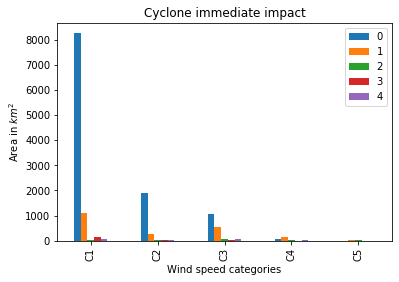

In [26]:
figure_im = im_cat.astype('float').plot(kind='bar', title='Cyclone immediate impact')
figure_im.set_ylabel('Area in $km^2$')
figure_im.set_xlabel('Wind speed categories')

In [27]:
lg_cat

,1,2,3,4,5
C1,2263.05,113.324,654.607,20.7919,7.40625
C2,646.56,22.6719,248.718,2.55063,0.834375
C3,715.229,90.5025,155.258,4.25875,2.44
C4,153.274,28.6569,12.9481,0.2575,0.7575
C5,3.04313,2.89625,1.47625,0.006875,0.214375


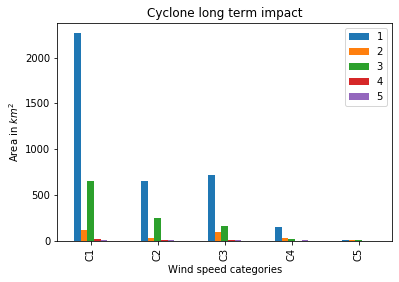

In [28]:
figure_lg = lg_cat.astype('float').plot(kind='bar', title='Cyclone long term impact')
figure_lg.set_ylabel('Area in $km^2$')
figure_lg.set_xlabel('Wind speed categories')
plt.show()